In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_excel("./AMC_health_and_safety_data.xlsx")

In [ ]:
colnames = df.columns
colnames

In [ ]:
df.info()

In [5]:
df.describe()

,DOCUMENT_NO,SUBUNIT_CD,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,FIPS_STATE_CD,SHIFT_BEGIN_TIME,NO_INJURIES,TOT_EXPER,MINE_EXPER,JOB_EXPER,SCHEDULE_CHARGE,DAYS_RESTRICT,DAYS_LOST,CLOSED_DOC_NO
count,3.601600e+04,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,35984.000000,36016.000000,33287.000000,33703.000000,33817.000000,26012.000000,26038.000000,31796.000000,1.788600e+04
mean,2.200876e+11,4.480231,2008.520824,2.460656,2008.746446,2.558169,1381.135023,39.095569,1313.260532,1.008885,13.619204,5.723015,6.886996,72.246079,3.957140,42.912002,3.200701e+11
std,6.297331e+07,9.700525,6.288091,1.101716,6.303127,1.109400,1384.876660,15.943200,1113.138097,1.082225,11.448689,8.053749,8.300943,637.465785,18.622301,76.015700,2.281208e+09
min,2.200000e+11,1.000000,2000.000000,1.000000,2000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,3.200414e+10
25%,2.200320e+11,1.000000,2003.000000,1.000000,2003.000000,2.000000,789.000000,21.000000,700.000000,1.000000,3.380000,0.620000,1.000000,0.000000,0.000000,0.000000,3.200310e+11
50%,2.200810e+11,1.000000,2008.000000,2.000000,2008.000000,3.000000,1205.000000,42.000000,800.000000,1.000000,10.000000,2.190000,3.270000,0.000000,0.000000,8.000000,3.200830e+11
75%,2.201330e+11,3.000000,2013.000000,3.000000,2013.000000,4.000000,1745.000000,54.000000,1600.000000,1.000000,23.230000,7.000000,10.000000,0.000000,0.000000,54.000000,3.201430e+11
max,2.202310e+11,99.000000,2023.000000,4.000000,2023.000000,4.000000,9999.000000,56.000000,9999.000000,36.000000,60.000000,53.620000,60.000000,6000.000000,1018.000000,2470.000000,3.202310e+11


In [6]:
df.describe(include=["object"])

,SUBUNIT,ACCIDENT_DT,DEGREE_INJURY_CD,DEGREE_INJURY,UG_LOCATION_CD,UG_LOCATION,UG_MINING_METHOD_CD,UG_MINING_METHOD,MINING_EQUIP_CD,MINING_EQUIP,...,INJ_BODY_PART_CD,INJ_BODY_PART,TRANS_TERM,RETURN_TO_WORK_DT,IMMED_NOTIFY_CD,IMMED_NOTIFY,INVEST_BEGIN_DT,NARRATIVE,COAL_METAL_IND,CLASSIFICATION
count,36016,36016,36016,36016,36016,36016,36016,36016,36016,36016,...,36016,36016,34175,33036,36016,36016,5548,36016,36016,36016
unique,9,7684,12,12,9,9,8,8,64,64,...,47,47,2,7227,14,14,3463,35939,2,11
top,UNDERGROUND,4/5/2010,3,DAYS AWAY FROM WORK ONLY,?,NO VALUE FOUND,5,Continuous Mining,?,NO VALUE FOUND,...,340,FINGER(S)/THUMB,N,5/1/2005,?,NO VALUE FOUND,6/22/2004,during a mine explosion ee was fatally injured.,C,HANDLING OF MATERIALS
freq,24492,40,19773,19773,11524,11524,16855,16855,17479,17479,...,6298,6298,32219,152,24203,24203,8,19,35988,22491


In [52]:
date_cols = [word for word in colnames if word.endswith("CD")]
len(date_cols)

13

In [14]:
# convert "Start Date" column to datetime data type
"""date_cols = [word for word in colnames if word.endswith("DT")]
print(date_cols)
df[date_cols] = pd.to_datetime(df[date_cols])"""
df['ACCIDENT_DT'] = pd.to_datetime(df['ACCIDENT_DT'])
df['RETURN_TO_WORK_DT'] = pd.to_datetime(df['RETURN_TO_WORK_DT'])
df['INVEST_BEGIN_DT'] = pd.to_datetime(df['INVEST_BEGIN_DT'])

In [8]:
df["CLASSIFICATION"].unique()

array(['HANDLING OF MATERIALS', 'SLIP OR FALL OF PERSON', 'HAULAGE',
       'FIRE/EXPLOSION', 'EXPLOSIVES AND BREAKING AGENTS', 'ELECTRICAL',
       'EXPLODING VESSELS UNDER PRESSURE', 'TOXIC', 'ENTRAPMENT',
       'INUNDATION', 'OTHER'], dtype=object)

In [59]:
counts = df["CLASSIFICATION"].value_counts()
counts

HANDLING OF MATERIALS               22491
SLIP OR FALL OF PERSON               7275
HAULAGE                              3830
FIRE/EXPLOSION                        779
OTHER                                 734
ELECTRICAL                            291
ENTRAPMENT                            248
INUNDATION                            168
EXPLODING VESSELS UNDER PRESSURE      165
EXPLOSIVES AND BREAKING AGENTS         22
TOXIC                                  13
Name: CLASSIFICATION, dtype: int64

In [60]:
colors = sns.color_palette('pastel')

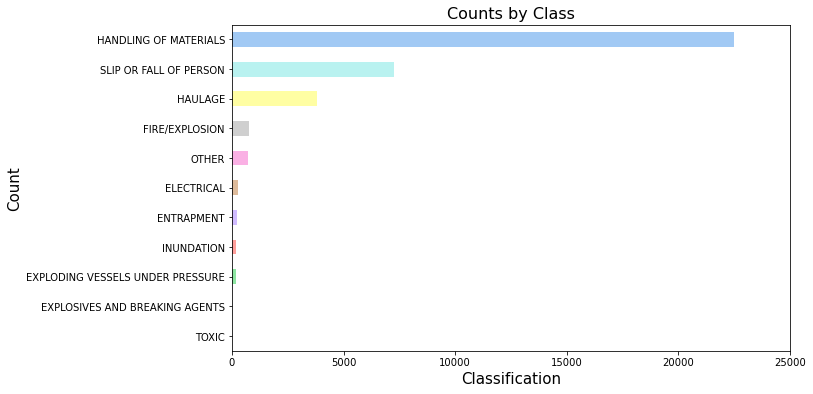

In [66]:
plt.figure(figsize=(10,6))
counts[::-1].plot(kind="barh",color=colors)
plt.xlabel('Classification',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Counts by Class',fontsize=16)
plt.tick_params(axis='y', labelsize=10)
plt.xlim(right=25000)
# Annotate count values on top of the bars
#for i, count in enumerate(counts[::-1]):
#    ax.text(count + 0.1, i, str(count), ha='left', va='center')
    
#max_count = counts.max()
#ax.text(max_count + 0.1, len(counts) - 1, str(max_count), ha='right', va='center')

plt.show()

In [22]:
counts = df["SUBUNIT_CD"].value_counts()
counts

1     24492
3      5642
30     3528
2      2125
99       85
17       63
4        45
5        30
6         6
Name: SUBUNIT_CD, dtype: int64

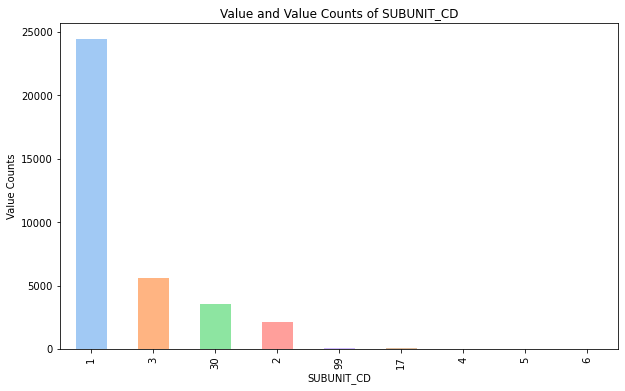

In [27]:
# Create a bar plot
plt.figure(figsize=(10,6))
counts.plot(kind="bar",color=colors)
# Add a title and labels to the axes
plt.title("Value and Value Counts of SUBUNIT_CD")
plt.xlabel("SUBUNIT_CD")
plt.ylabel("Value Counts")

# Show the plot
plt.show()

In [40]:
counts = df["CAL_YR"].value_counts()
counts.sort_index(inplace=True)
counts

2000    2831
2001    2812
2002    2625
2003    1736
2004    2016
2005    1890
2006    1969
2007    1710
2008    1758
2009    1657
2010    1691
2011    1788
2012    1573
2013    1484
2014    1455
2015    1192
2016     838
2017     907
2018     861
2019     990
2020     678
2021     676
2022     763
2023     116
Name: CAL_YR, dtype: int64

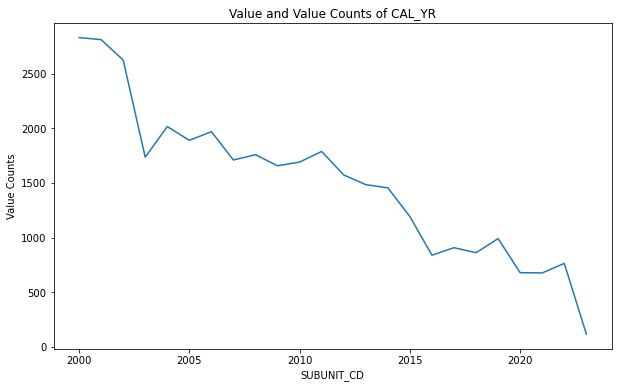

In [41]:
# Create a bar plot
plt.figure(figsize=(10,6))
plt.plot(counts.index,counts.values)
# Add a title and labels to the axes
plt.title("Value and Value Counts of CAL_YR")
plt.xlabel("SUBUNIT_CD")
plt.ylabel("Value Counts")

# Show the plot
plt.show()

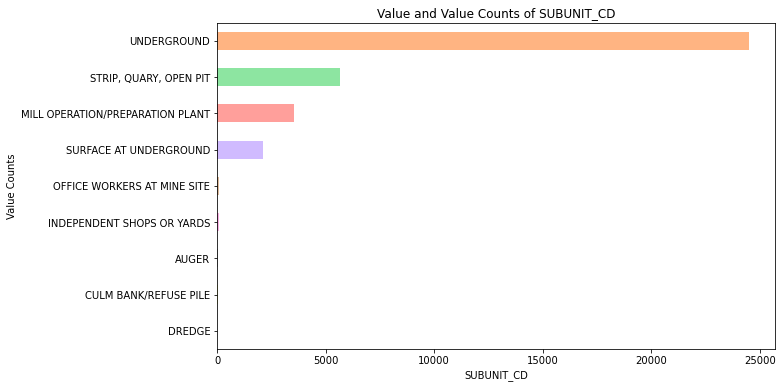

In [33]:
counts = df["SUBUNIT"].value_counts()
counts
# Create a bar plot
plt.figure(figsize=(10,6))
counts[::-1].plot(kind="barh",color=colors[::-1])
# Add a title and labels to the axes
plt.title("Value and Value Counts of SUBUNIT_CD")
plt.xlabel("SUBUNIT_CD")
plt.ylabel("Value Counts")

# Show the plot
plt.show()

In [67]:
counts = df["ACTIVITY"].value_counts()
counts
"""
# Identify classes with counts below the threshold
classes_to_combine = counts[counts < 500].index

# Combine the classes into "Others"
df["ACTIVITY"] = df["ACTIVITY"].apply(lambda x: "Others" if x in classes_to_combine else x)

# Update the counts with the combined classes
new_counts = df["ACTIVITY"].value_counts()
new_counts"""

'\n# Identify classes with counts below the threshold\nclasses_to_combine = counts[counts < 500].index\n\n# Combine the classes into "Others"\ndf["ACTIVITY"] = df["ACTIVITY"].apply(lambda x: "Others" if x in classes_to_combine else x)\n\n# Update the counts with the combined classes\nnew_counts = df["ACTIVITY"].value_counts()\nnew_counts'

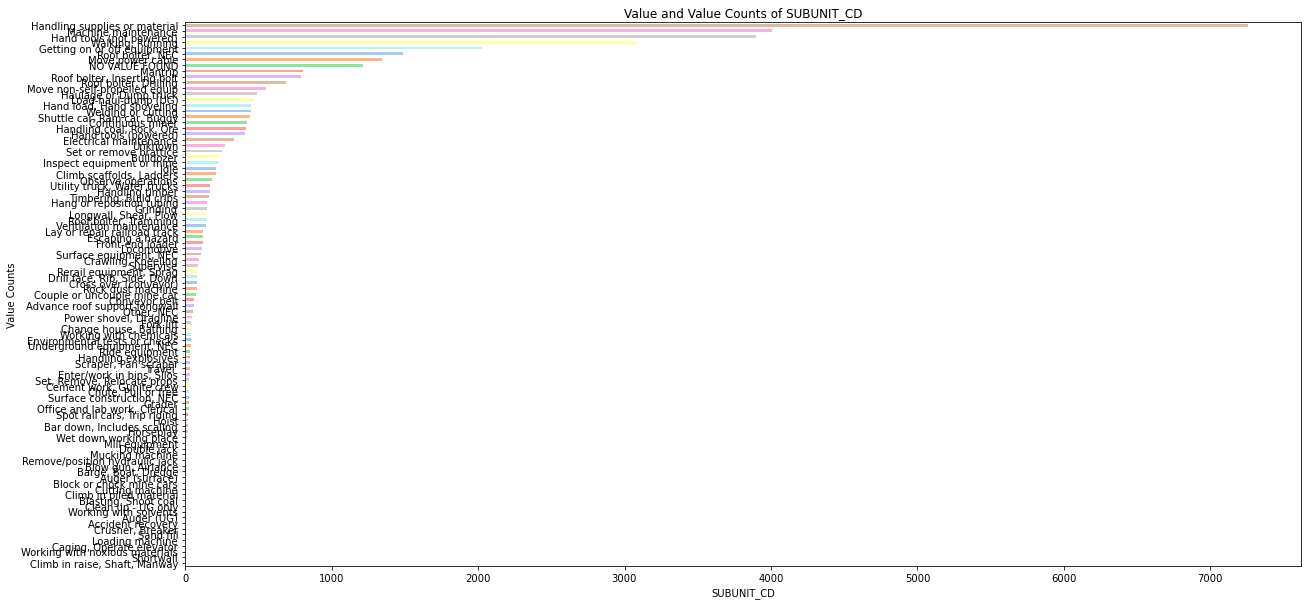

In [68]:
# Create a bar plot
plt.figure(figsize=(20,10))
counts[::-1].plot(kind="barh",color=colors[::-1])
# Add a title and labels to the axes
plt.title("Value and Value Counts of SUBUNIT_CD")
plt.xlabel("SUBUNIT_CD")
plt.ylabel("Value Counts")

# Show the plot
plt.show()

In [69]:
counts = df["CAL_QTR"].value_counts()
counts

3    9596
1    9257
2    9037
4    8126
Name: CAL_QTR, dtype: int64

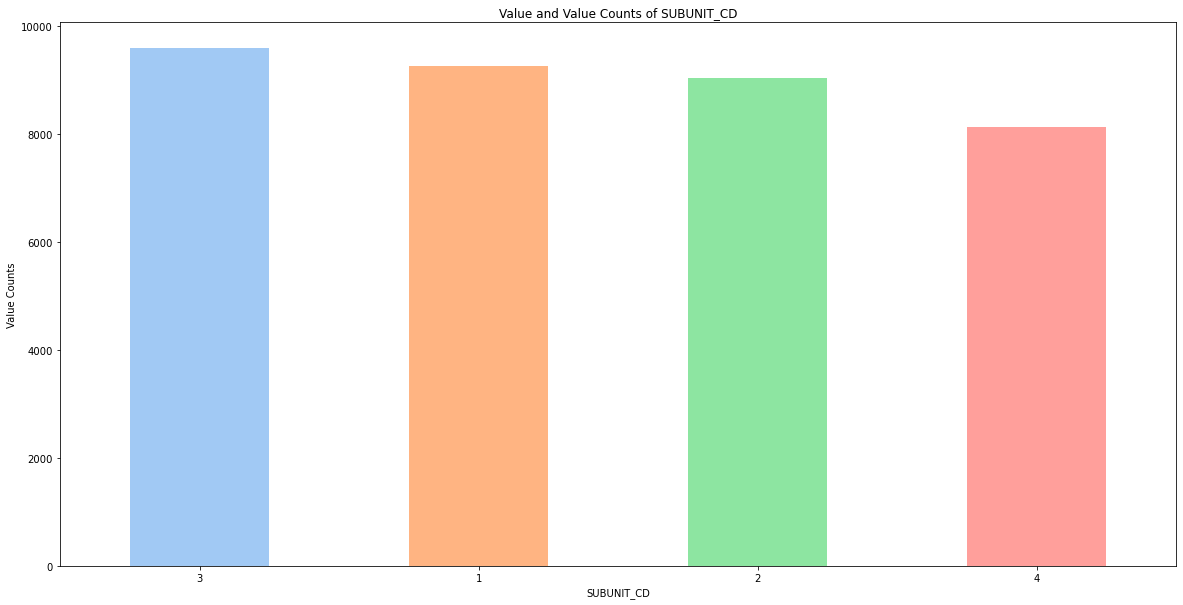

In [74]:
# Create a bar plot
plt.figure(figsize=(20,10))
counts.plot(kind="bar",color=colors)
# Add a title and labels to the axes
plt.title("Value and Value Counts of SUBUNIT_CD")
plt.xlabel("SUBUNIT_CD")
plt.ylabel("Value Counts")
plt.xticks(rotation=0)
# Show the plot
plt.show()

In [79]:
counts = df["ACTIVITY_CD"].value_counts()
counts.values

array([7256, 4006, 3895, 3085, 2029, 1485, 1345, 1213,  807,  792,  689,
        555,  491,  473,  451,  450,  443,  425,  413,  410,  331,  275,
        253,  227,  226,  214,  208,  184,  171,  170,  160,  153,  150,
        149,  148,  146,  125,  123,  119,  114,  112,   94,   91,   87,
         84,   79,   78,   74,   61,   61,   54,   48,   43,   42,   42,
         41,   39,   36,   34,   32,   32,   31,   29,   27,   26,   26,
         24,   24,   22,   20,   19,   17,   14,   13,    9,    9,    8,
          7,    7,    7,    7,    6,    6,    6,    5,    4,    4,    3,
          3,    3,    2,    2,    1,    1,    1], dtype=int64)

In [80]:
counts = df["ACTIVITY"].value_counts()
counts.values

array([7256, 4006, 3895, 3085, 2029, 1485, 1345, 1213,  807,  792,  689,
        555,  491,  473,  451,  450,  443,  425,  413,  410,  331,  275,
        253,  227,  226,  214,  208,  184,  171,  170,  160,  153,  150,
        149,  148,  146,  125,  123,  119,  114,  112,   94,   91,   87,
         84,   79,   78,   74,   61,   61,   54,   48,   43,   42,   42,
         41,   39,   36,   34,   32,   32,   31,   29,   27,   26,   26,
         24,   24,   22,   20,   19,   17,   14,   13,    9,    9,    8,
          7,    7,    7,    7,    6,    6,    6,    5,    4,    4,    3,
          3,    3,    2,    2,    1,    1,    1], dtype=int64)

In [6]:
df["UG_MINING_METHOD_CD"].value_counts()

5    16855
?    13962
1     3817
8     1176
3      156
6       42
2        5
7        3
Name: UG_MINING_METHOD_CD, dtype: int64

In [7]:
df["UG_MINING_METHOD"].value_counts()

Continuous Mining       16855
NO VALUE FOUND          13962
Longwall                 3817
Other                    1176
Conventional Stoping      156
Hand                       42
Shortwall                   5
Caving                      3
Name: UG_MINING_METHOD, dtype: int64

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install -U spacy
# !python -m spacy download en_core_web_sm
import spacy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.sparse import hstack
import warnings
#warnings.filterwarnings('ignore')

In [3]:
path =r"AMC_health_and_safety_data.xlsx"
df = pd.read_excel(path,na_values=['?',"No Value Found"])
df.shape

(36016, 49)

In [4]:
df.columns

Index(['DOCUMENT_NO', 'SUBUNIT_CD', 'SUBUNIT', 'ACCIDENT_DT', 'CAL_YR',
       'CAL_QTR', 'FISCAL_YR', 'FISCAL_QTR', 'ACCIDENT_TIME',
       'DEGREE_INJURY_CD', 'DEGREE_INJURY', 'FIPS_STATE_CD', 'UG_LOCATION_CD',
       'UG_LOCATION', 'UG_MINING_METHOD_CD', 'UG_MINING_METHOD',
       'MINING_EQUIP_CD', 'MINING_EQUIP', 'EQUIP_MFR_CD', 'EQUIP_MFR_NAME',
       'EQUIP_MODEL_NO', 'SHIFT_BEGIN_TIME', 'ACCIDENT_TYPE', 'NO_INJURIES',
       'TOT_EXPER', 'MINE_EXPER', 'JOB_EXPER', 'OCCUPATION_CD', 'OCCUPATION',
       'ACTIVITY_CD', 'ACTIVITY', 'INJURY_SOURCE_CD', 'INJURY_SOURCE',
       'NATURE_INJURY_CD', 'NATURE_INJURY', 'INJ_BODY_PART_CD',
       'INJ_BODY_PART', 'SCHEDULE_CHARGE', 'DAYS_RESTRICT', 'DAYS_LOST',
       'TRANS_TERM', 'RETURN_TO_WORK_DT', 'IMMED_NOTIFY_CD', 'IMMED_NOTIFY',
       'INVEST_BEGIN_DT', 'NARRATIVE', 'CLOSED_DOC_NO', 'COAL_METAL_IND',
       'CLASSIFICATION'],
      dtype='object')

In [11]:
df["SUBUNIT_CD"].value_counts()

1     24492
3      5642
30     3528
2      2125
99       85
17       63
4        45
5        30
6         6
Name: SUBUNIT_CD, dtype: int64

In [13]:
df["SUBUNIT"].value_counts()

UNDERGROUND                         24492
STRIP, QUARY, OPEN PIT               5642
MILL OPERATION/PREPARATION PLANT     3528
SURFACE AT UNDERGROUND               2125
OFFICE WORKERS AT MINE SITE            85
INDEPENDENT SHOPS OR YARDS             63
AUGER                                  45
CULM BANK/REFUSE PILE                  30
DREDGE                                  6
Name: SUBUNIT, dtype: int64

In [32]:
# Assuming you have a Series named 'accident_time_counts' with the value counts
# Convert the "ACCIDENT_TIME" column to datetime format

# of the "ACCIDENT_TIME" column
most_frequent_time = df["ACCIDENT_TIME"].value_counts().idxmax()

# Replace missing values (9999) with NaN
df["ACCIDENT_TIME"].replace(9999, pd.NaT, inplace=True)


# Fill missing values with the most frequent time
df["ACCIDENT_TIME"].fillna(most_frequent_time, inplace=True)

# Convert three-digit valid time values to 24-hour time format
df["ACCIDENT_TIME"] = pd.to_datetime(df["ACCIDENT_TIME"].astype(str).str.zfill(4), format="%H%M", errors="coerce").dt.strftime("%H:%M:%S")


In [34]:
df["ACCIDENT_TYPE"].value_counts()

Struck by... NEC                                                    5604
Over-exertion NEC                                                   4616
Over-exertion in lifting objects                                    3414
Caught in, under or between a moving and a stationary object        3091
Struck by falling object                                            2839
Fall to the walkway or working surface                              2085
Struck against a moving object                                      1894
Struck against stationary object                                    1588
Caught in, under or between NEC                                     1522
Struck by flying object                                             1515
Fall onto or against objects                                        1357
Over-exertion in pulling or pushing objects                         1343
Accident type, without injuries                                     1176
Fall from machine                                  

In [35]:
# Define the start and end times for night and day
night_start_time = pd.to_datetime("18:00:00").time()
night_end_time = pd.to_datetime("06:00:00").time()

# Create a new column to indicate night and day
df["Time_of_Day"] = df["ACCIDENT_TIME"].apply(lambda x: "Night" if night_start_time <= x.time() <= night_end_time else "Day")

# Now, you can use the "Time_of_Day" column to group events based on night and day
night_events = df[df["Time_of_Day"] == "Night"]
day_events = df[df["Time_of_Day"] == "Day"]

AttributeError: 'str' object has no attribute 'time'